[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ElMartinez31/Data_Science/blob/main/Course/Classical_Frameworks/tuto_image_convolution.ipynb)

Visual representation of how is performed a convolution witth pooling in a CNN. Made by chatgpt




Image d'entrée
[[1 2 1 0 0]
 [4 3 2 1 0]
 [1 2 3 2 1]
 [0 1 2 3 2]
 [0 0 1 2 3]]

Filtre
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]

Résultat de la convolution
[[ 0.  4.  5.]
 [-2.  0.  4.]
 [-5. -4.  0.]]

Après ReLU
[[0. 4. 5.]
 [0. 0. 4.]
 [0. 0. 0.]]

Après MaxPooling 2x2
[[4.]]


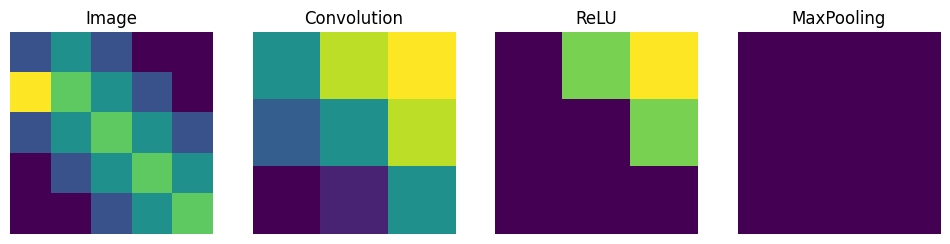

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def print_matrix(mat, title=""):
    print(f"\n{title}")
    print(np.array_str(mat, precision=1, suppress_small=True))

# Étape 1 : Image d'entrée
image = np.array([
    [1, 2, 1, 0, 0],
    [4, 3, 2, 1, 0],
    [1, 2, 3, 2, 1],
    [0, 1, 2, 3, 2],
    [0, 0, 1, 2, 3]
])
print_matrix(image, "Image d'entrée")

# Étape 2 : Filtre de convolution
filtre = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])
print_matrix(filtre, "Filtre")

# Étape 3 : Convolution manuelle
output_shape = (image.shape[0] - filtre.shape[0] + 1, image.shape[1] - filtre.shape[1] + 1)
conv_output = np.zeros(output_shape)

for i in range(output_shape[0]):
    for j in range(output_shape[1]):
        block = image[i:i+3, j:j+3]
        conv_output[i, j] = np.sum(block * filtre)

print_matrix(conv_output, "Résultat de la convolution")

# Étape 4 : ReLU
relu_output = np.maximum(conv_output, 0)
print_matrix(relu_output, "Après ReLU")

# Étape 5 : MaxPooling 2x2
pool_size = 2
pool_output_shape = (relu_output.shape[0] // pool_size, relu_output.shape[1] // pool_size)
pool_output = np.zeros(pool_output_shape)

for i in range(pool_output.shape[0]):
    for j in range(pool_output.shape[1]):
        block = relu_output[i*pool_size:(i+1)*pool_size, j*pool_size:(j+1)*pool_size]
        pool_output[i, j] = np.max(block)

print_matrix(pool_output, "Après MaxPooling 2x2")

# Affichage final visuel
plt.figure(figsize=(12, 3))

plt.subplot(1, 4, 1)
plt.title("Image")
plt.imshow(image, cmap='viridis')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Convolution")
plt.imshow(conv_output, cmap='viridis')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("ReLU")
plt.imshow(relu_output, cmap='viridis')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("MaxPooling")
plt.imshow(pool_output, cmap='viridis')
plt.axis('off')

plt.show()
